# Uso normal de UDMA y Comblck

Script de prueba para usar el Comblock a traves de UDMA

In [130]:
 # MLab UDMA library
import udma

# All python libraries
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

### Interfaz con el hardware via UDMA

In [131]:
IP_ADDRESS = '192.168.1.10'
IP_PORT = 7

In [132]:
pynq = udma.UDMA_CLASS(IP_ADDRESS, IP_PORT)

In [133]:
connectionStatus = 0
while(connectionStatus == 0):
    connectionStatus = pynq.connect()
    sleep(1)

In [134]:
_ = pynq.log(1)

## Mapeo de registros

In [135]:
REG0 = 0
REG1 = 1
REG2 = 2
REG_MUX = 3

In [136]:
[_, reg0_val] = pynq.read_reg(REG0)
[_, reg1_val] = pynq.read_reg(REG1) 
[_, reg2_val] = pynq.read_reg(REG2)
[_, reg_mux_val] = pynq.read_reg(REG_MUX)

print("REG0: ", reg0_val)
print("REG1: ", reg1_val)
print("REG2: ", reg2_val)
print("REG_MUX: ", reg_mux_val)

REG0:  (0,)
REG1:  (0,)
REG2:  (0,)
REG_MUX:  (0,)


In [137]:
pynq.write_reg(REG0, 10)
pynq.write_reg(REG1, 20)
pynq.write_reg(REG2, 30)

[_, reg0_val] = pynq.read_reg(REG0)
[_, reg1_val] = pynq.read_reg(REG1) 
[_, reg2_val] = pynq.read_reg(REG2)

print("REG0: ", reg0_val)
print("REG1: ", reg1_val)
print("REG2: ", reg2_val)

REG0:  (30,)
REG1:  (20,)
REG2:  (10,)


## Lectura y escritura de FiFo

In [138]:
CLR_INP_FIFO = 37
CLR_OUT_FIFO = 33

# Clear FIFOs
pynq.write_reg(CLR_INP_FIFO, 1)
pynq.write_reg(CLR_OUT_FIFO, 1)

# Normal operation
pynq.write_reg(CLR_INP_FIFO, 0)
pynq.write_reg(CLR_OUT_FIFO, 0)

[(1, 0), 0]

In [139]:
salida = np.linspace(0, 63, 64).astype(np.uint32).tolist()

print(salida)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


## Lectura inicial de la FiFo

In [140]:
entrada = pynq.read_fifo(64)[1]  # Clear output FIFO

print("Fifo = ", entrada)

Fifo =  0


## Escritura de la FiFo

In [141]:
pynq.write_fifo(length = 64, Txdata = salida)

entrada = pynq.read_fifo(64)[1]  # Clear output FIFO

print("Fifo = ", entrada)


Fifo =  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63)


## Lectura de RAM

In [171]:
pynq.write_reg(REG_MUX, 2)
[_, reg_mux_val] = pynq.read_reg(REG_MUX)
print("REG_MUX: ", reg_mux_val)


REG_MUX:  (2,)


(33059266, 33059265, 3, 1, 0, 11019755, 235, 0, 1, 0, 0, 235, 0, 0, 0, 235, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


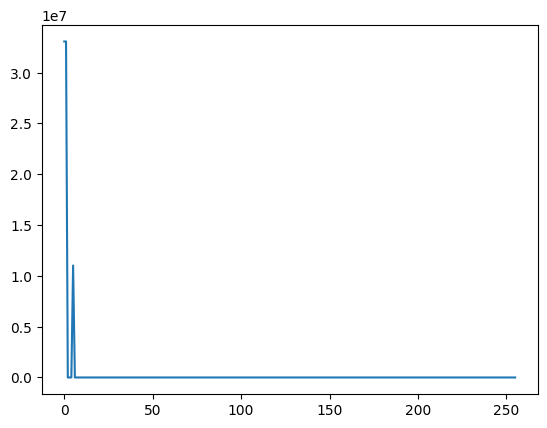

In [172]:
histo = pynq.read_ram(addr=0,length=256,inc=1)[1]
print(histo)
plt.plot(histo)
plt.show()